# Data Preprocessing and Feature Engineering

## Environment Setup
First, we install the required packages.

In [1]:
%pip install nltk spacy pandas jsonlines
%pip install --upgrade numpy==1.22.0
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Next, we import the required libraries.

In [2]:
import json
import nltk
from preprocessing import Preprocessing as pp

## Data Preprocessing Pipeline

### Loading the dataset

We load the dataset and display it in multiple formats.

In [3]:
train_data = pp.load_dataset('../data/NewsMTSC-dataset/train.jsonl')
devtest_mt = pp.load_dataset('../data/NewsMTSC-dataset/devtest_mt.jsonl')
devtest_rw = pp.load_dataset('../data/NewsMTSC-dataset/devtest_rw.jsonl')

for i in range(5):
    print("Train data", i)
    print(train_data[i])

Train data 0
{'primary_gid': 'allsides_1000_401_25_Reality Leigh Winner_0_6', 'sentence_normalized': 'Winner wrote that she had a 30-minute private meeting with the Republican lawmaker’s state policy director.', 'targets': [{'Input.gid': 'allsides_1000_401_25_Reality Leigh Winner_0_6', 'from': 0, 'to': 6, 'mention': 'Winner', 'polarity': 4.0}]}
Train data 1
{'primary_gid': 'allsides_1000_401_3_Reality Leigh Winner_0_3', 'sentence_normalized': 'She also recently referred to President Trump as a “piece of shit” because of his position on the Dakota Access Pipeline (DAPL) protests.', 'targets': [{'Input.gid': 'allsides_1000_401_3_Reality Leigh Winner_0_3', 'from': 0, 'to': 3, 'mention': 'She', 'polarity': 2.0}, {'Input.gid': 'allsides_1000_401_3_’ Trump_30_45', 'from': 30, 'to': 45, 'mention': 'President Trump', 'polarity': 2.0}]}
Train data 2
{'primary_gid': 'allsides_1018_408_1_Hillary Clinton_2_17', 'sentence_normalized': 'Hillary Clinton blamed the Democratic National Committee, Faceb

In [4]:
print("Train data size:", len(train_data))
print("Devtest MT data size:", len(devtest_mt))
print("Devtest RW data size:", len(devtest_rw))
print("Total data size:", len(train_data) + len(devtest_mt) + len(devtest_rw))

Train data size: 7758
Devtest MT data size: 721
Devtest RW data size: 1067
Total data size: 9546


### Exploring the dataset

We explore the dataset to understand its structure and the features it contains. We will need to look at the dataset as a whole, as well as features relevant for each target value.

In [5]:
# Splitting train data into target categories
train_data_split = pp.split_data_by_target(train_data)
for category in train_data_split:
    print("Category:", category)
    print(train_data_split[category][0])

Category: 2.0
{'primary_gid': 'allsides_1000_401_3_Reality Leigh Winner_0_3', 'sentence_normalized': 'She also recently referred to President Trump as a “piece of shit” because of his position on the Dakota Access Pipeline (DAPL) protests.', 'targets': [{'Input.gid': 'allsides_1000_401_3_Reality Leigh Winner_0_3', 'from': 0, 'to': 3, 'mention': 'She', 'polarity': 2.0}, {'Input.gid': 'allsides_1000_401_3_’ Trump_30_45', 'from': 30, 'to': 45, 'mention': 'President Trump', 'polarity': 2.0}]}
Category: 4.0
{'primary_gid': 'allsides_1000_401_25_Reality Leigh Winner_0_6', 'sentence_normalized': 'Winner wrote that she had a 30-minute private meeting with the Republican lawmaker’s state policy director.', 'targets': [{'Input.gid': 'allsides_1000_401_25_Reality Leigh Winner_0_6', 'from': 0, 'to': 6, 'mention': 'Winner', 'polarity': 4.0}]}
Category: 6.0
{'primary_gid': "allsides_1031_412_7_Donald Trump's_94_99", 'sentence_normalized': '“The reasons for my departure are personal, but it has been 

First we look at the distribution of the target variable.

Sentiment Class Distribution:
Counter({2.0: 3316, 4.0: 3028, 6.0: 2395})


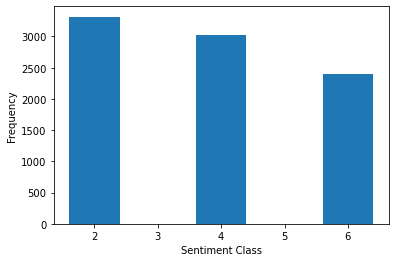

In [6]:
pp.find_distribution(train_data)

Then, we look at some features of the text in a quantitative and qualitative manner.

Train data sentence lengths:

Sentence Length Distribution:
Counter({20: 273, 23: 264, 18: 257, 22: 253, 15: 250, 19: 249, 21: 248, 24: 246, 14: 243, 13: 228, 16: 227, 25: 227, 17: 219, 27: 219, 26: 217, 29: 216, 10: 206, 12: 198, 11: 194, 30: 189, 28: 185, 9: 184, 31: 174, 8: 167, 32: 164, 33: 157, 35: 150, 34: 131, 36: 125, 7: 122, 38: 122, 37: 114, 40: 112, 6: 107, 39: 106, 41: 98, 43: 90, 42: 90, 5: 74, 45: 51, 48: 47, 49: 47, 44: 43, 4: 41, 47: 41, 50: 40, 46: 36, 53: 30, 52: 26, 54: 22, 51: 20, 55: 20, 57: 19, 56: 16, 64: 14, 59: 14, 3: 12, 61: 9, 60: 9, 58: 8, 65: 8, 63: 7, 71: 6, 62: 6, 78: 5, 66: 5, 70: 5, 68: 5, 72: 4, 69: 4, 74: 4, 84: 3, 73: 2, 83: 2, 86: 2, 82: 2, 119: 2, 79: 2, 76: 2, 89: 2, 77: 2, 97: 1, 81: 1, 174: 1, 67: 1, 85: 1, 80: 1, 101: 1, 161: 1, 125: 1, 90: 1, 98: 1, 92: 1, 798: 1, 110: 1, 88: 1, 100: 1, 225: 1, 139: 1})


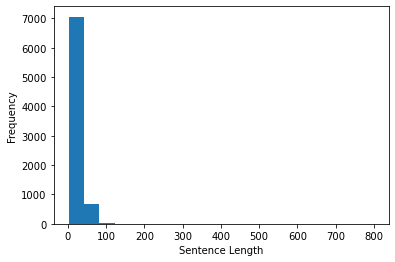

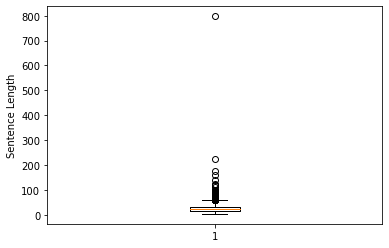

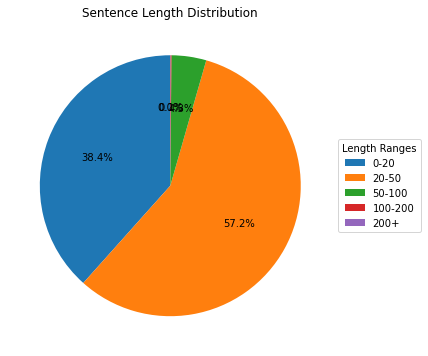

In [7]:
print("Train data sentence lengths:")
pp.find_sentence_lengths(train_data)

The sentence length distribution shows that the sentences are around 0-50 words long, with some longer sentences of over 100 words. There is an outlier sentence with around 800 words!

Let's see if this distribution changes when we look at the target variable.

Train data sentence lengths per category:
Category: 2.0

Sentence Length Distribution:
Counter({18: 120, 19: 110, 27: 110, 21: 107, 20: 105, 22: 104, 24: 102, 29: 101, 30: 101, 25: 100, 23: 97, 15: 95, 26: 95, 31: 94, 17: 89, 16: 88, 10: 85, 33: 83, 13: 83, 28: 81, 14: 79, 35: 75, 37: 70, 12: 69, 34: 64, 9: 62, 36: 60, 32: 60, 11: 60, 38: 59, 41: 56, 40: 54, 8: 53, 39: 51, 43: 49, 42: 40, 7: 31, 45: 31, 48: 27, 6: 26, 49: 25, 47: 24, 44: 19, 53: 18, 46: 17, 50: 15, 5: 15, 52: 14, 55: 13, 54: 12, 56: 10, 51: 10, 57: 8, 59: 8, 63: 8, 66: 7, 64: 6, 4: 5, 61: 4, 65: 4, 58: 4, 60: 4, 78: 3, 71: 3, 62: 3, 73: 2, 69: 2, 70: 2, 3: 2, 84: 2, 98: 2, 72: 2, 89: 2, 97: 1, 81: 1, 174: 1, 74: 1, 68: 1, 82: 1, 101: 1, 161: 1, 90: 1, 79: 1, 76: 1, 100: 1, 77: 1, 139: 1, 86: 1})


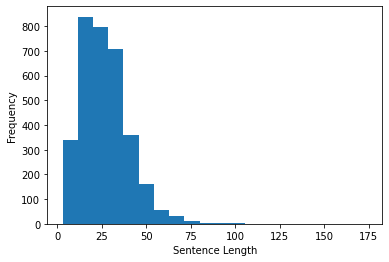

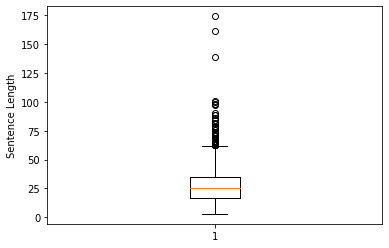

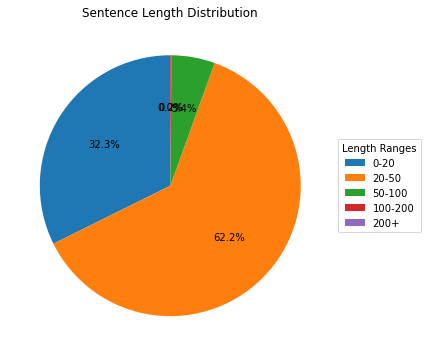

Category: 4.0

Sentence Length Distribution:
Counter({20: 121, 23: 114, 14: 113, 18: 111, 16: 110, 15: 101, 11: 97, 21: 97, 19: 96, 13: 94, 17: 94, 9: 92, 24: 89, 10: 88, 12: 87, 22: 85, 8: 85, 25: 83, 26: 78, 32: 72, 29: 70, 27: 69, 28: 68, 30: 65, 7: 62, 6: 59, 33: 55, 31: 53, 35: 51, 36: 45, 40: 39, 34: 39, 5: 36, 38: 35, 41: 34, 37: 32, 43: 31, 39: 31, 4: 26, 42: 21, 46: 16, 44: 16, 45: 14, 49: 13, 48: 13, 52: 12, 47: 12, 50: 11, 3: 9, 53: 8, 54: 8, 64: 7, 59: 6, 51: 6, 56: 6, 55: 5, 57: 4, 60: 3, 61: 3, 78: 2, 79: 2, 69: 2, 68: 2, 65: 2, 77: 2, 71: 2, 58: 1, 67: 1, 101: 1, 74: 1, 119: 1, 83: 1, 798: 1, 84: 1, 110: 1, 63: 1, 62: 1, 89: 1, 82: 1, 225: 1})


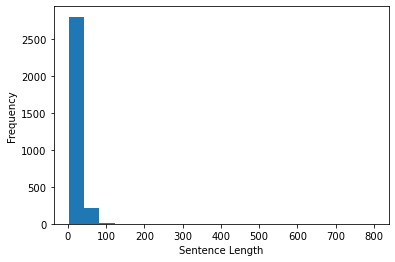

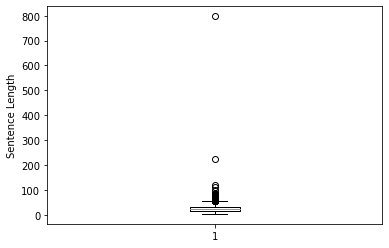

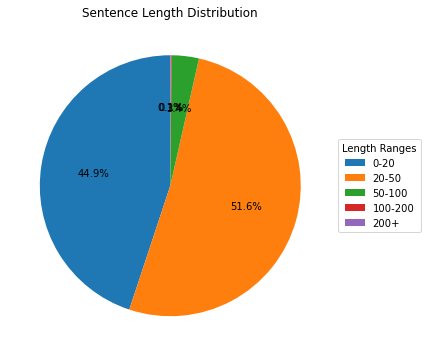

Category: 6.0

Sentence Length Distribution:
Counter({22: 99, 24: 93, 20: 87, 15: 86, 23: 85, 21: 77, 14: 73, 25: 73, 13: 72, 29: 72, 27: 71, 26: 71, 19: 68, 28: 65, 18: 65, 31: 63, 17: 62, 12: 58, 32: 55, 10: 54, 16: 54, 30: 54, 11: 53, 33: 47, 38: 46, 34: 45, 35: 44, 8: 40, 9: 40, 36: 39, 39: 38, 7: 37, 40: 36, 42: 35, 37: 34, 41: 28, 5: 27, 6: 27, 43: 23, 50: 17, 49: 14, 45: 14, 48: 13, 44: 12, 57: 11, 47: 11, 4: 10, 46: 9, 53: 9, 55: 8, 64: 5, 51: 5, 52: 5, 58: 5, 65: 5, 54: 5, 56: 3, 59: 3, 70: 3, 60: 3, 71: 3, 72: 2, 66: 2, 61: 2, 80: 2, 74: 2, 68: 2, 62: 2, 83: 1, 86: 1, 85: 1, 3: 1, 125: 1, 92: 1, 88: 1, 79: 1, 119: 1, 89: 1, 76: 1, 63: 1})


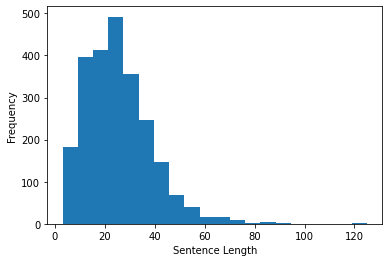

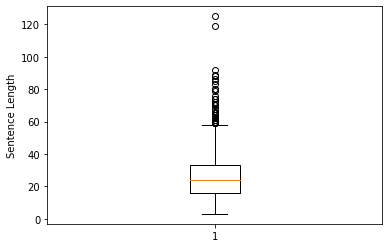

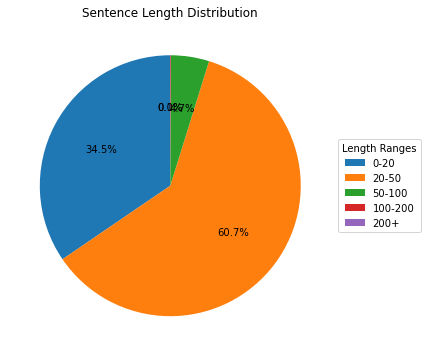

In [8]:
print("Train data sentence lengths per category:")
for category in train_data_split:
    print("Category:", category)
    pp.find_sentence_lengths(train_data_split[category])

The distribution of sentence lengths for each target value is similar to the overall distribution. If we look very closely, the distribution of sentence lengths for target values 2.0 and 4.0 is slightly different from the overall distribution.

It doesn't seem to us that the sentence length is a good feature to use for classification.

What if we look at the most common words in the text data?


High-Frequency Words:
[('the', 8598), ('to', 5446), ('of', 4516), ('and', 4295), ('a', 4150)]


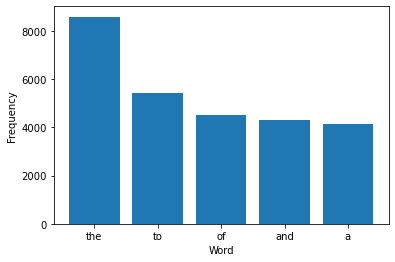

In [9]:
pp.find_high_frequency_words(train_data)

Train data high frequency words per category:
Category: 2.0

High-Frequency Words:
[('the', 3804), ('to', 2439), ('of', 2223), ('and', 1909), ('a', 1855)]


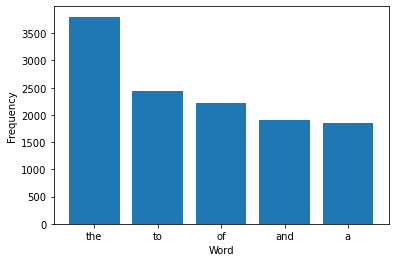

Category: 4.0

High-Frequency Words:
[('the', 3047), ('to', 1906), ('of', 1512), ('a', 1432), ('and', 1402)]


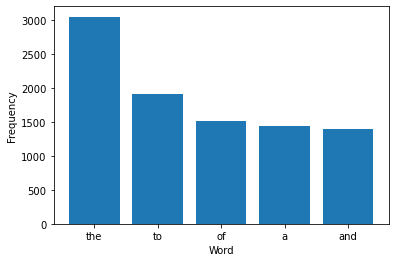

Category: 6.0

High-Frequency Words:
[('the', 2908), ('to', 1826), ('and', 1644), ('of', 1439), ('a', 1435)]


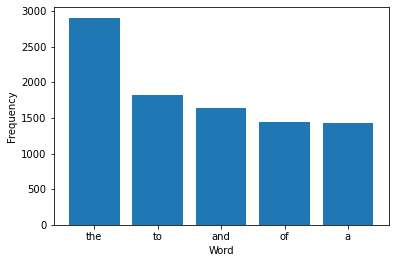

In [10]:
print("Train data high frequency words per category:")
for category in train_data_split:
    print("Category:", category)
    pp.find_high_frequency_words(train_data_split[category])

Okay, so this is not helpful. Of course, we have the common conjunctions, determinants and pronouns as the most frequented words. Maybe we should try removing these common words and see if we can find some better ones. We use the `stopwords` package from the NLTK corpus to remove the common words.

In [11]:
nltk.download('stopwords')
train_data = pp.remove_stopwords(train_data)
devtest_mt = pp.remove_stopwords(devtest_mt)
devtest_rw = pp.remove_stopwords(devtest_rw)

for category in train_data_split:
    train_data_split[category] = pp.remove_stopwords(train_data_split[category])

[nltk_data] Downloading package stopwords to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



High-Frequency Words:
[('Trump', 1205), ('said', 1027), ('Mr.', 813), ('The', 692), ('President', 596)]


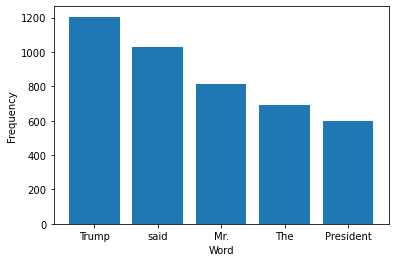

In [12]:
pp.find_high_frequency_words(train_data)

Train data high frequency words per category:
Category: 2.0

High-Frequency Words:
[('Trump', 690), ('The', 362), ('Mr.', 360), ('said', 351), ('President', 272)]


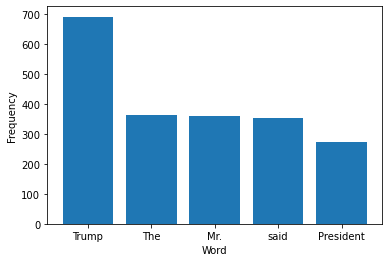

Category: 4.0

High-Frequency Words:
[('said', 490), ('Trump', 420), ('Mr.', 297), ('The', 260), ('said.', 248)]


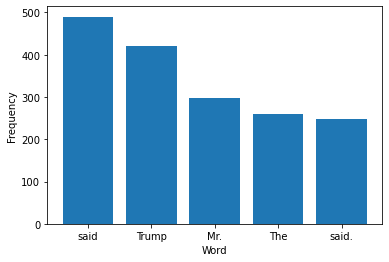

Category: 6.0

High-Frequency Words:
[('said', 298), ('Trump', 286), ('Mr.', 262), ('Obama', 184), ('The', 177)]


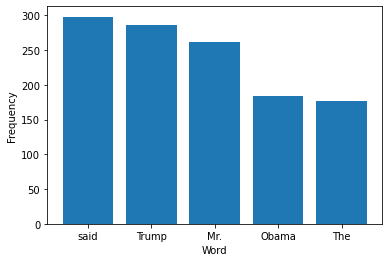

In [13]:
# Frequency distribution of words per category
print("Train data high frequency words per category:")
for category in train_data_split:
    print("Category:", category)
    pp.find_high_frequency_words(train_data_split[category])

Okay! Now we have some interesting words. From the initial distribution, it looks like `Trump` and `Obama` are pretty common in the text, as is `said` and `president`. `Mr` is also popular, we're not sure if it's very useful (could be, if gender affects sentiment in some way). We'll leave it as it is.

As for the distribution for specific targets, `Trump` is significantly more popular in negative sentiment text compared to the overall distribution. We see `Obama` ranked higher in the positive sentiment text. `Clinton` also sneaks into the top 10 for negative sentiment text. Are political figures a good feature to use for understanding sentiment? Maybe. Statistically speaking, of course ;)

But we cannot rely on these words alone. Political figures are only present in some sentences, and as we have seen, the distribution of the frequency of these words is not drastically different across target values. `Trump` and `Obama` has made appearences in all types of sentiment, so the context will be much more important if we want to understand the sentiment. We need better features.

We noticed another thing! `Donald` has crept up the ranks in the negative sentiment text, as if chasing it's other half `Trump`. This raises an interesting question: how does co-occurrence of words affect sentiment? We can use n-grams to find out.

Train data co-occurence statistics:


[nltk_data] Downloading package punkt to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


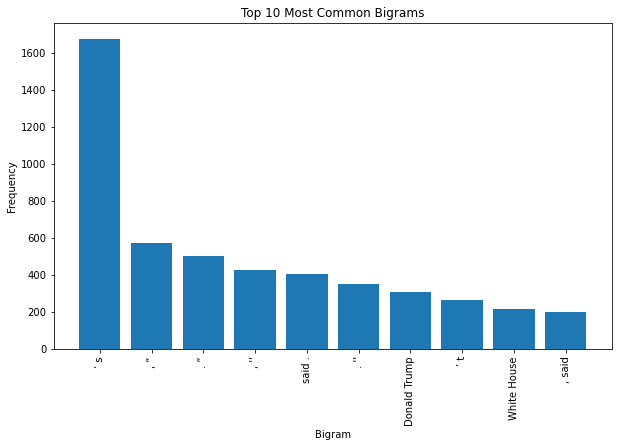

In [14]:
nltk.download('punkt')
print("Train data co-occurence statistics:")
pp.calculate_co_occurrence(train_data)

Well, this is a problem. We forgot to remove the punctuation from the text data before extracting n-grams. We should do that first.

In [15]:
train_data = pp.remove_punctuation(train_data)
devtest_mt = pp.remove_punctuation(devtest_mt)
devtest_rw = pp.remove_punctuation(devtest_rw)
for category in train_data_split:
    train_data_split[category] = pp.remove_punctuation(train_data_split[category])

Train data co-occurence statistics:


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


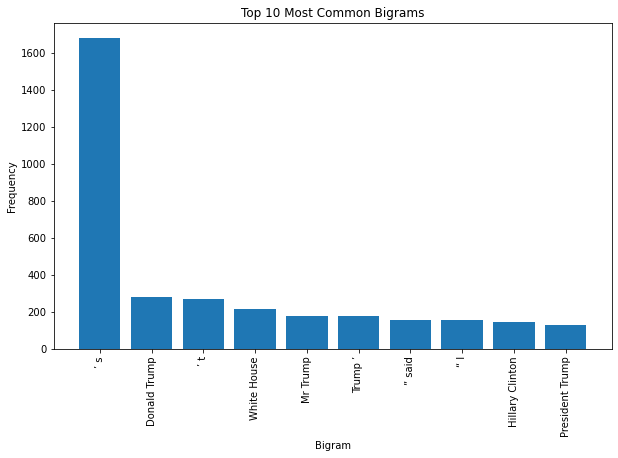

In [16]:
print("Train data co-occurence statistics:")
pp.calculate_co_occurrence(train_data)

Okay, now we have some bigrams that represent real word pairs, although some non-alphanumeric characters are showing up as well. For now, let's see if this distribution changes in the target values.

Category: 2.0


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


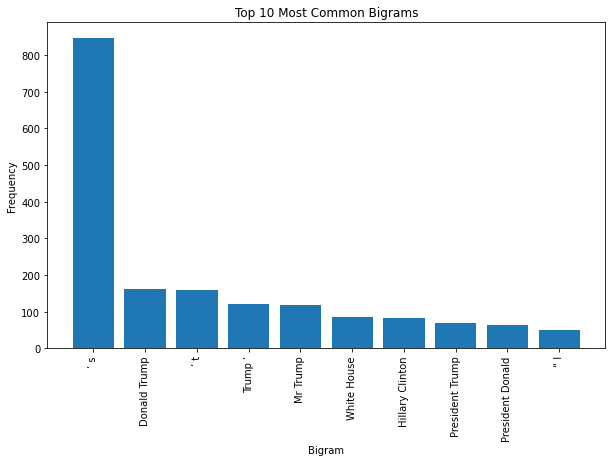

Category: 4.0


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


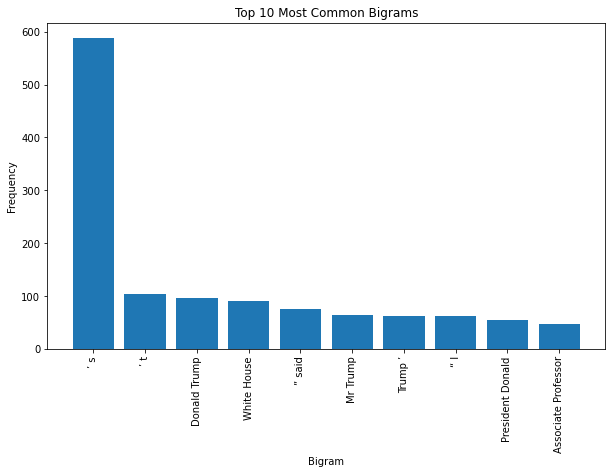

Category: 6.0


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


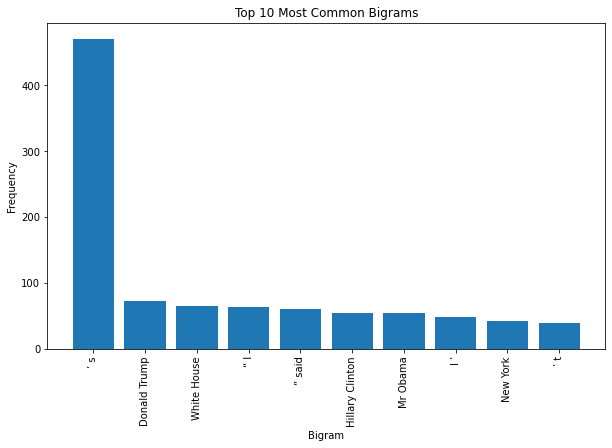

In [17]:
for category in train_data_split:
    print("Category:", category)
    pp.calculate_co_occurrence(train_data_split[category])

`Donald Trump` and `White House` consistently dominates these rankings. Not very helpful.

We still need to deal with the non-alphanumeric characters in the dataset. They don't really add any value to understanding the sentiment of a sentence in our opinion. We should remove them.

In [18]:
train_data = pp.remove_non_alphanumeric(train_data)
devtest_mt = pp.remove_non_alphanumeric(devtest_mt)
devtest_rw = pp.remove_non_alphanumeric(devtest_rw)

Let's see if that worked. We'll extract bigrams again.

Train data co-occurence statistics:


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /s/chopin/l/grad/c837200008/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


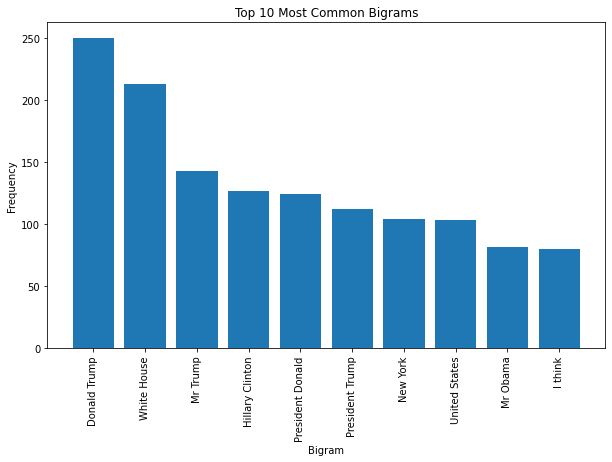

In [19]:
print("Train data co-occurence statistics:")
pp.calculate_co_occurrence(train_data)

Cool! Let's try applying Porter Stemming algorithm to this data now.


In [20]:
# Apply Porter Stem algorithm to the train_data

# train_data = pp.porter_stemming(train_data)
# devtest_mt = pp.porter_stemming(devtest_mt)
# devtest_rw = pp.porter_stemming(devtest_rw)


## Taking this out because we're doing this for specific models only!

Finally, we should extract the normalized text and the target variable from the dataset. We will use the normalized text for feature extraction and the target variable for classification. Everything else will be dropped as they are not relevant to this particular investigation.

In [21]:
train_data = pp.extract_relevant_columns(train_data)
devtest_mt = pp.extract_relevant_columns(devtest_mt)
devtest_rw = pp.extract_relevant_columns(devtest_rw)

It seems that the statistical and word-based features are not very helpful in understanding sentiment. But the data now is in a good shape to be used for training some models. We will use the features we have extracted so far, and we will also use the text data as it is. The deep learning models can choose the best features themselves.

Let's dump the data to a file and move on to the next notebook where we will train some models.

In [22]:
# Write the preprocessed data to a file
pp.write_preprocessed_data(train_data, '../data/NewsMTSC-dataset/train_preprocessed.jsonl')
pp.write_preprocessed_data(devtest_mt, '../data/NewsMTSC-dataset/devtest_mt_preprocessed.jsonl')
pp.write_preprocessed_data(devtest_rw, '../data/NewsMTSC-dataset/devtest_rw_preprocessed.jsonl')